In [2]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from scipy.stats import zscore as zs
from scipy import linalg as scipy_linalg
from sklearn.model_selection import train_test_split as split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)
from keras.optimizers import SGD
from IPython.display import display, Image

In [3]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
from pylab import rcParams
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

DATA DESCRIPTION

In [4]:
file_path = 'https://raw.githubusercontent.com/datzxje/ML_Project/main/data/saved/merged_data.csv'
df = pd.read_csv(file_path)
df.head(2)

,Date,gold_open,gold_high,gold_low,gold_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
0,2024-05-20,2422.2,2454.2,2411.1,2438.5,5.079,79.30,104.57,1.0857,512.26,16794.87,88.50,1063.7,2102.50,32.426,5308.13,12.15
1,2024-05-17,2381.4,2427.4,2377.8,2417.4,5.050,79.58,104.45,1.0871,505.33,16685.97,87.39,1090.0,2095.72,31.259,5303.27,11.99


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        251 non-null    object 
 1   gold_open   251 non-null    float64
 2   gold_high   251 non-null    float64
 3   gold_low    251 non-null    float64
 4   gold_close  251 non-null    float64
 5   copper      251 non-null    float64
 6   crude_oil   251 non-null    float64
 7   DXY         251 non-null    float64
 8   EURUSD      251 non-null    float64
 9   MSCI        251 non-null    float64
 10  NASDAQ      251 non-null    float64
 11  NLR         251 non-null    float64
 12  platinum    251 non-null    float64
 13  RUT         251 non-null    float64
 14  silver      251 non-null    float64
 15  SP500       251 non-null    float64
 16  VIX         251 non-null    float64
dtypes: float64(16), object(1)
memory usage: 33.5+ KB


In [7]:
df.describe().drop(['25%', '50%', '75%']).transpose()

,count,mean,std,min,max
gold_open,251.0,2047.725100,141.542142,1834.3000,2422.200
gold_high,251.0,2061.645817,146.044025,1843.5000,2454.200
gold_low,251.0,2035.956574,139.018621,1823.5000,2411.100
gold_close,251.0,2048.419124,143.109833,1831.8000,2438.500
copper,251.0,3.891920,0.287770,3.5520,5.079
crude_oil,251.0,78.661673,5.851691,67.1200,93.680
DXY,251.0,103.957131,1.544371,99.7700,107.000
EURUSD,251.0,1.081981,0.014891,1.0466,1.124
MSCI,251.0,522.618645,34.761044,446.0000,604.300
NASDAQ,251.0,14558.585618,1161.859867,12484.1600,16794.870


In [8]:
#Check missing value
df.isnull().sum()

Date          0
gold_open     0
gold_high     0
gold_low      0
gold_close    0
copper        0
crude_oil     0
DXY           0
EURUSD        0
MSCI          0
NASDAQ        0
NLR           0
platinum      0
RUT           0
silver        0
SP500         0
VIX           0
dtype: int64

In [10]:
##Converting Date column as DateTime format
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [11]:
df.dtypes

Date          datetime64[ns]
gold_open            float64
gold_high            float64
gold_low             float64
gold_close           float64
copper               float64
crude_oil            float64
DXY                  float64
EURUSD               float64
MSCI                 float64
NASDAQ               float64
NLR                  float64
platinum             float64
RUT                  float64
silver               float64
SP500                float64
VIX                  float64
dtype: object

In [12]:
df.set_index('Date',inplace=True)

In [13]:
df.head(2)

,gold_open,gold_high,gold_low,gold_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
Date,,,,,,,,,,,,,,,,
2024-05-20,2422.2,2454.2,2411.1,2438.5,5.079,79.30,104.57,1.0857,512.26,16794.87,88.50,1063.7,2102.50,32.426,5308.13,12.15
2024-05-17,2381.4,2427.4,2377.8,2417.4,5.050,79.58,104.45,1.0871,505.33,16685.97,87.39,1090.0,2095.72,31.259,5303.27,11.99


Exploratory Data Analysis(EDA)

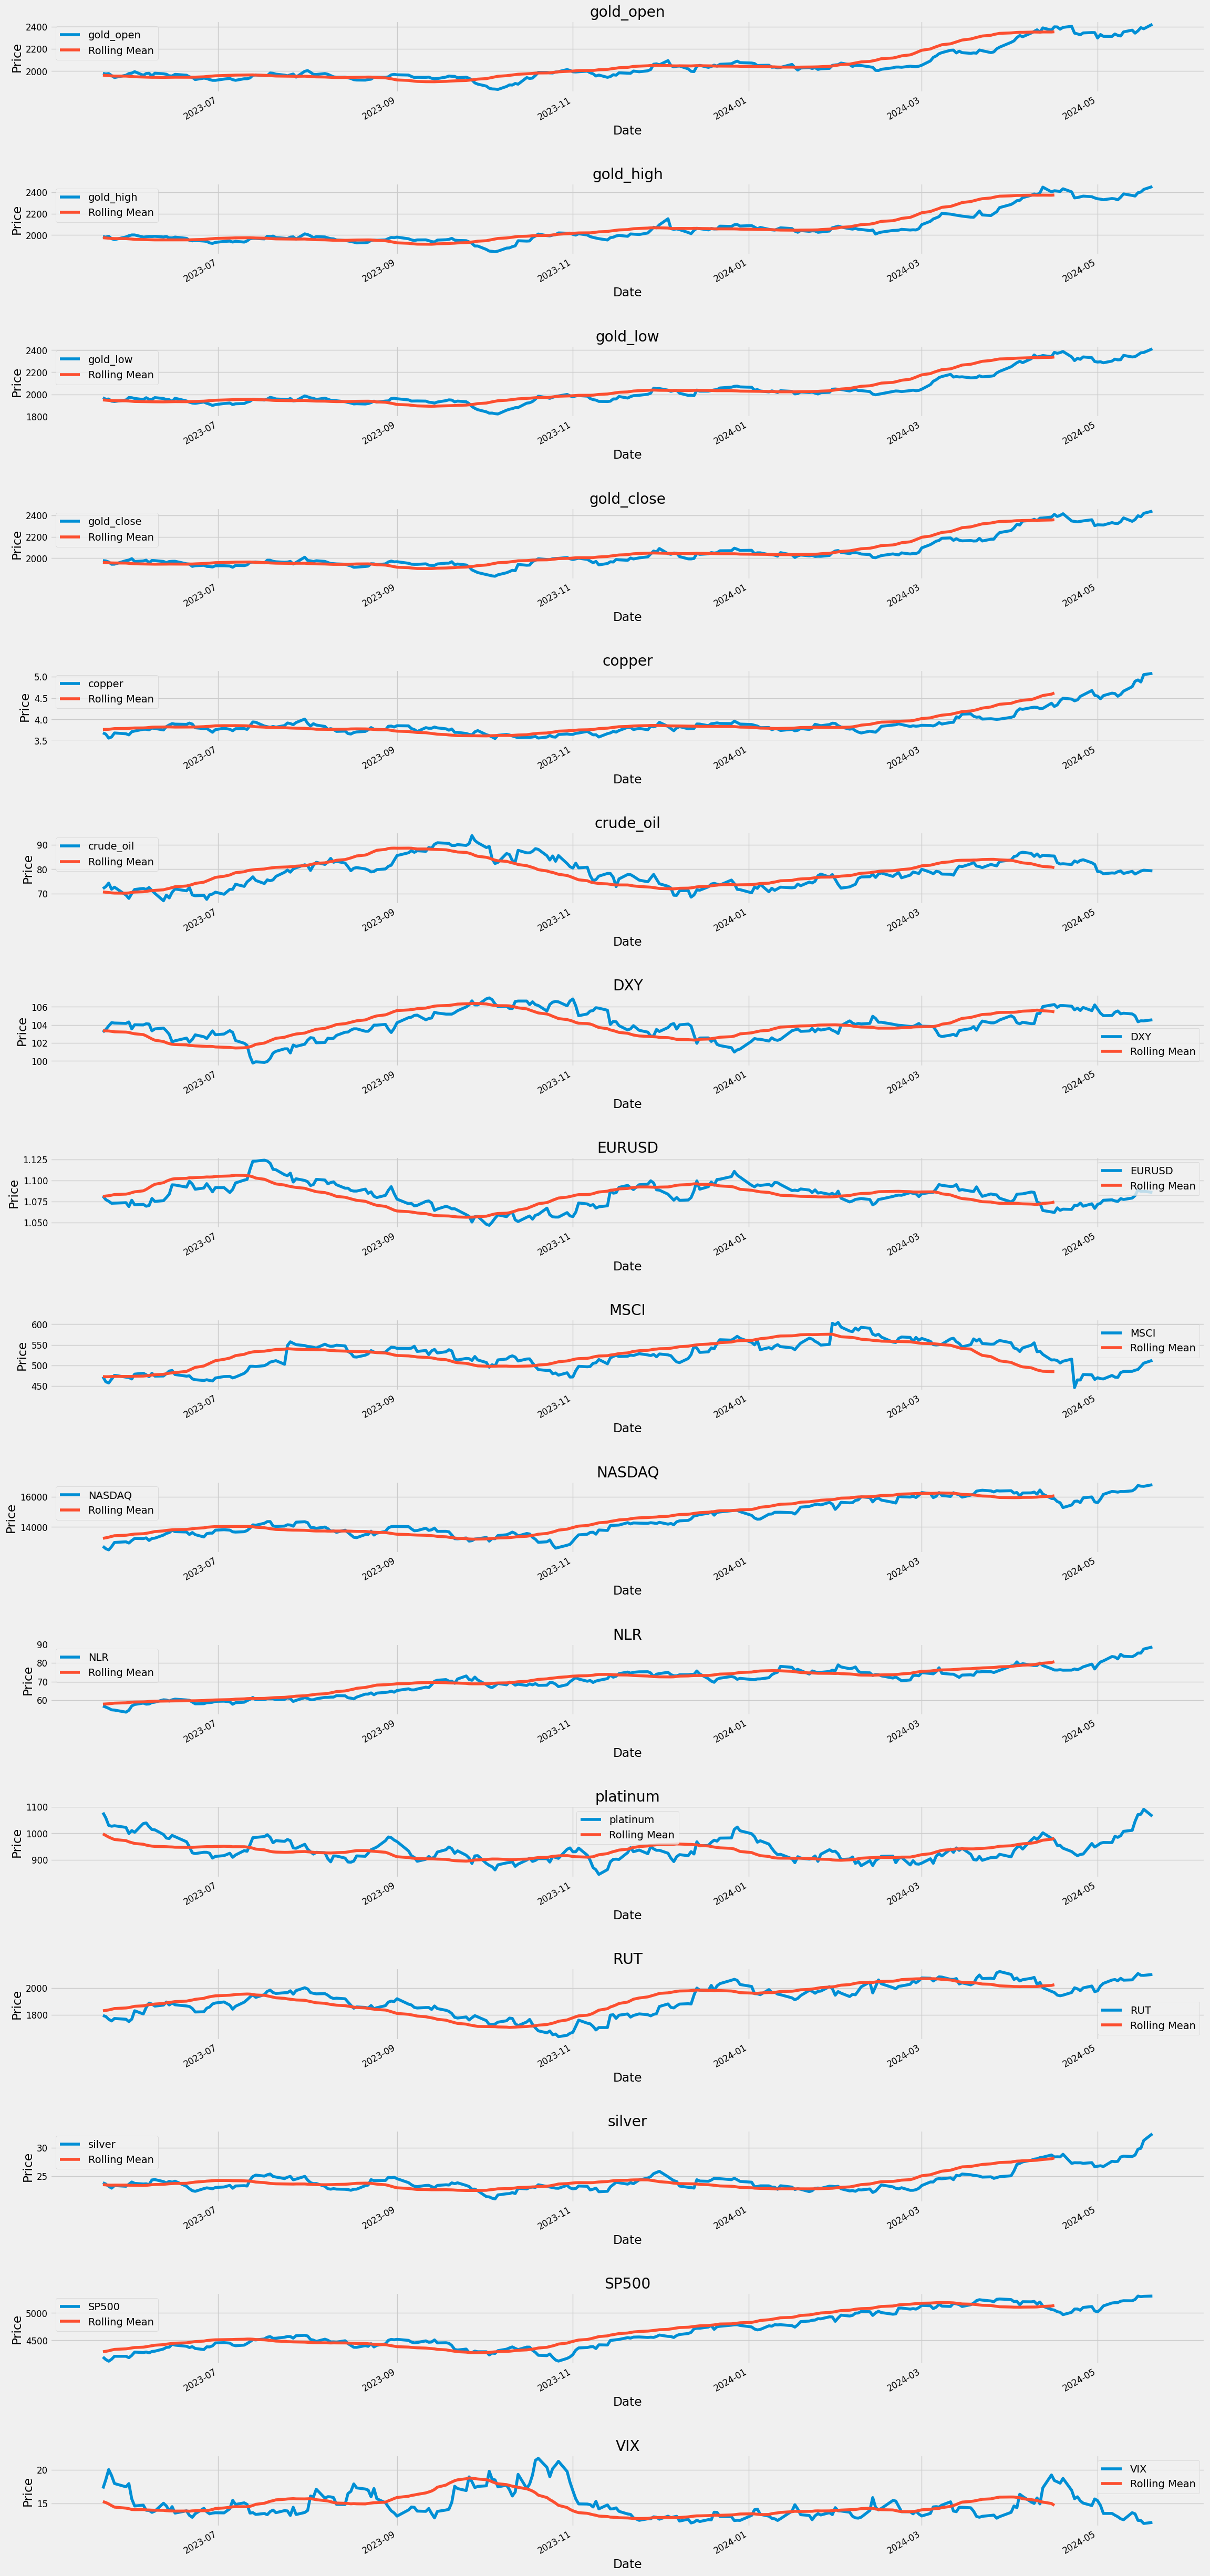

In [19]:
##Line Plots Target & Features
data = df
col_names = data.columns

fig = plt.figure(figsize=(24, 50))
plt.style.use('fivethirtyeight')
for i in range(16):
  ax = fig.add_subplot(16,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(25).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

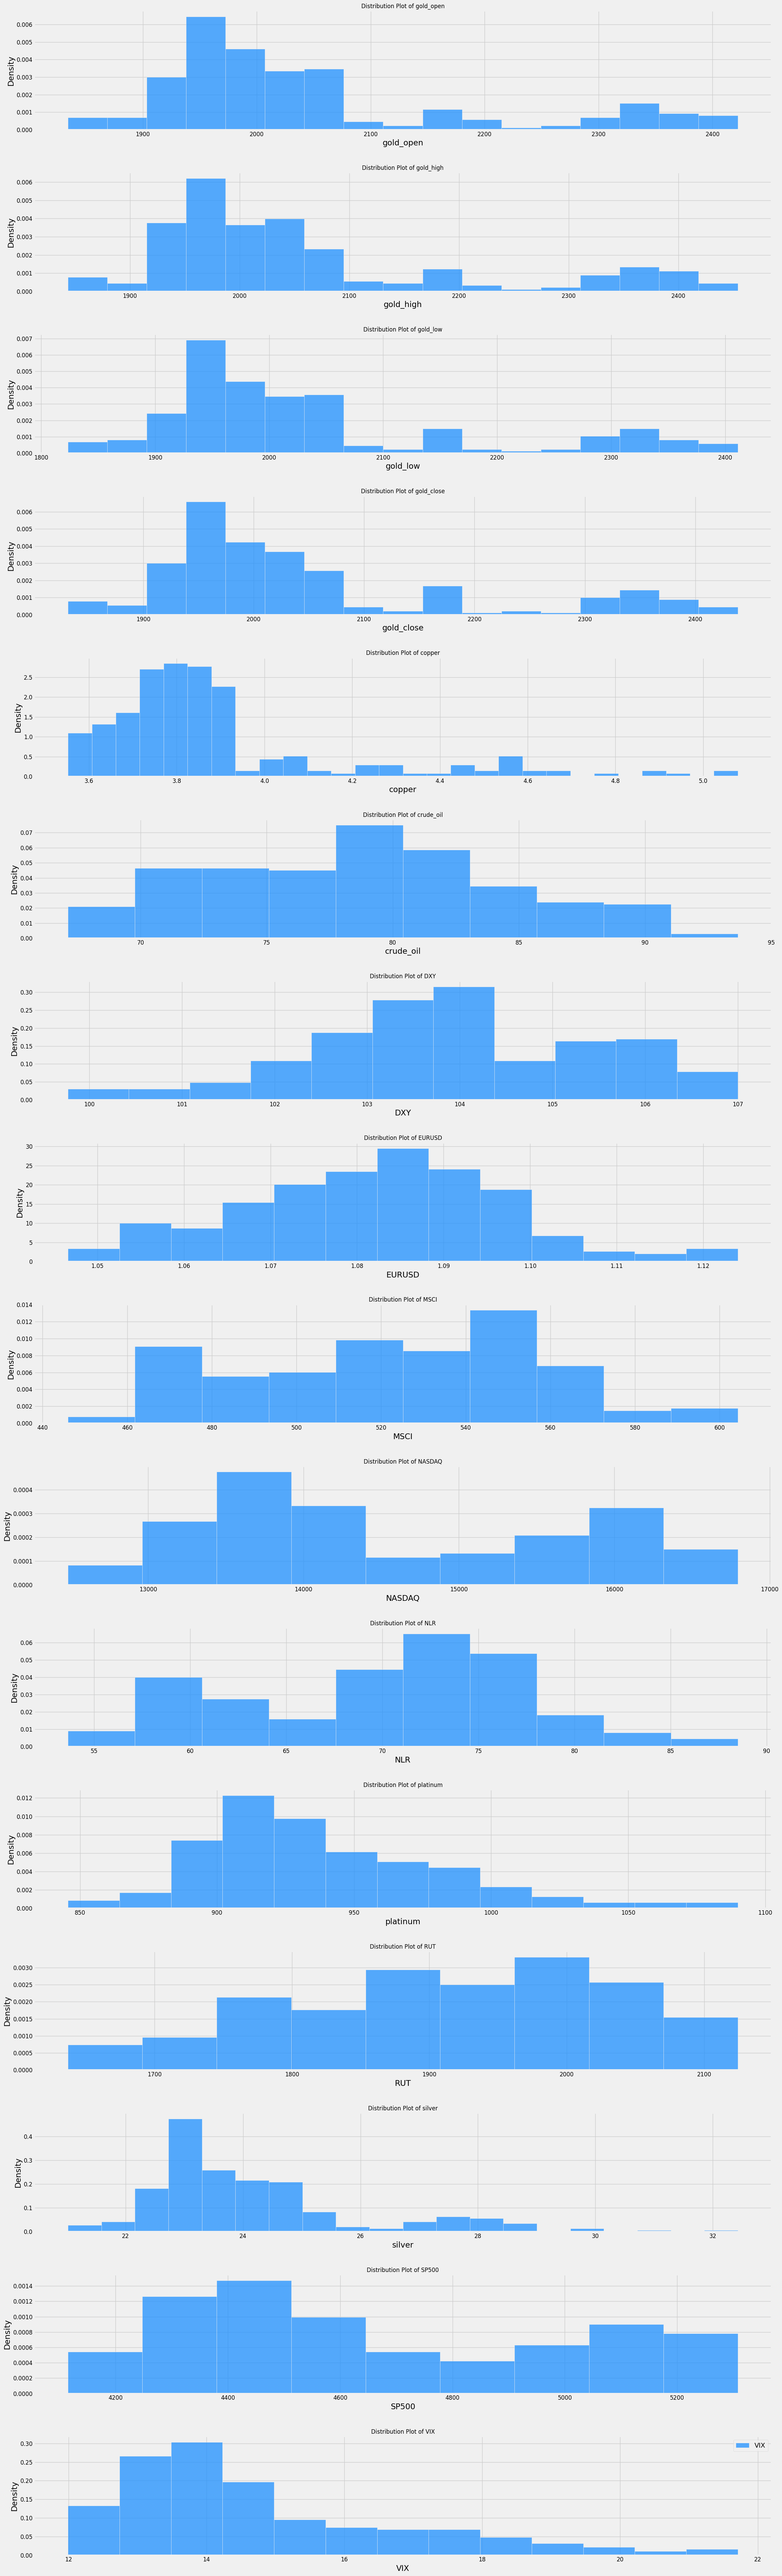

In [24]:
##Checking if Target and Features follow Normal Distribution
data = df
fig, axes = plt.subplots(nrows=16, ncols=1, figsize=(24, 80))
plt.style.use('fivethirtyeight')
col_names = data.columns

for i, ax in enumerate(axes.flatten()):
    sns.histplot(data.iloc[:, i], color='dodgerblue', ax=ax, label=col_names[i], stat='density')
    ax.set_title(f"Distribution Plot of {col_names[i]}", fontsize=12)
    ax.tick_params(labelsize=12)

fig.tight_layout(pad=3.0)
fig.subplots_adjust(top=0.95)  # Thêm dòng này để tránh tiêu đề bị cắt
plt.legend(loc='upper right')  # Thêm vị trí cho legend
plt.show()

Từ các biểu đồ phân phối ở trên :

-> Khoảng giá trị phổ biến nhất của giá vàng thường là từ 1900 đến 2000.

-> Các giá trị của giá vàng thường ít khi trên 2400.

-> Tất cả các đặc trưng đều không tuân theo đinh luật phân phối chuẩn.

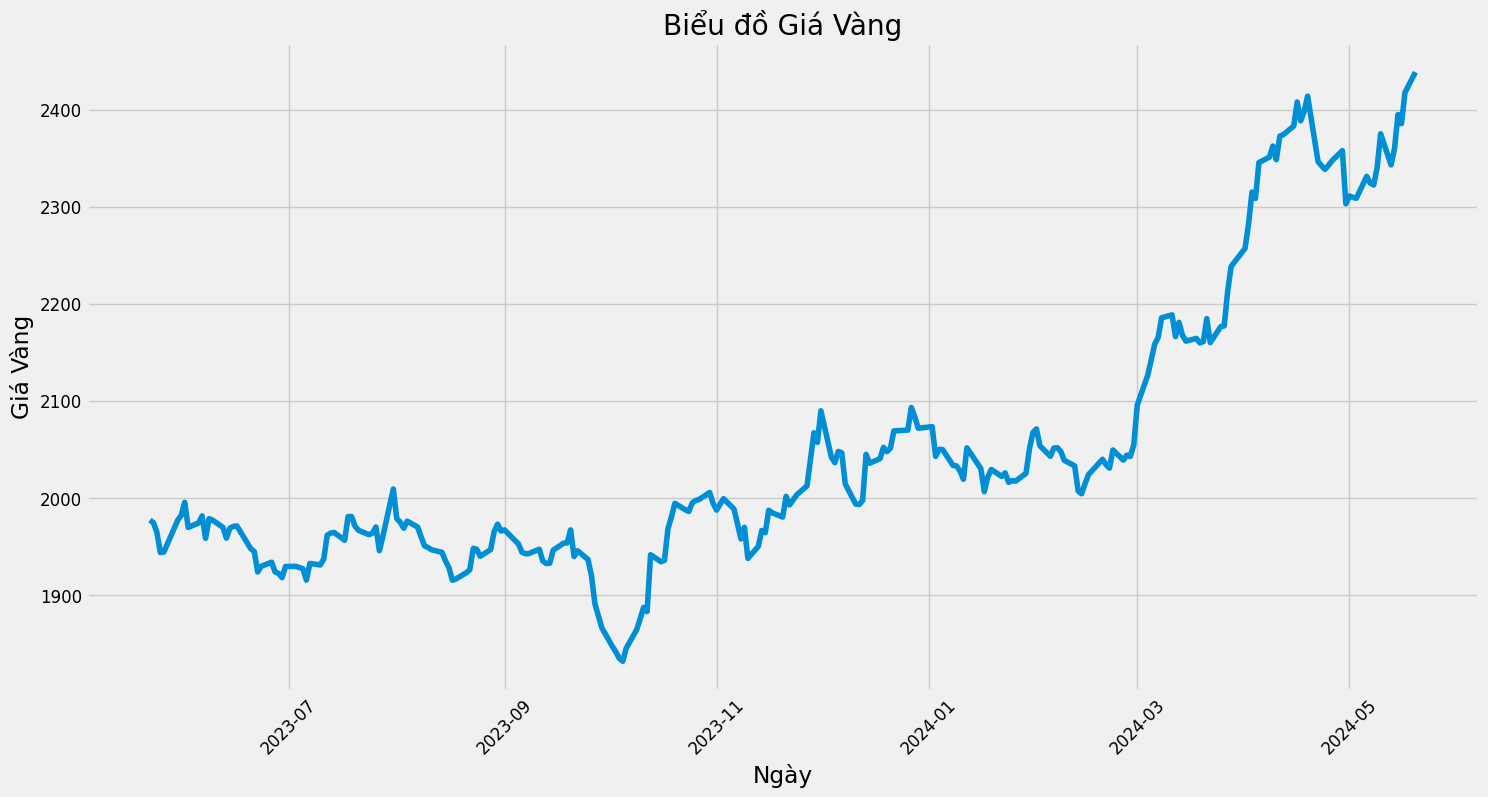

In [27]:
#Plotting Gold Closeing Prices

data = pd.read_csv('D:\Gold-price-prediction\ML_Project\data\saved\merged_data.csv')

# Lấy dữ liệu của cột 'gold_close'
gold_close = data['gold_close']

# Lấy dữ liệu của cột 'Date'
dates = pd.to_datetime(data['Date'])

# Vẽ biểu đồ dữ liệu toàn thời gian
plt.figure(figsize=(16, 8))  # Đặt kích thước của biểu đồ
plt.plot(dates, gold_close)
plt.title('Biểu đồ Giá Vàng')
plt.xlabel('Ngày')
plt.ylabel('Giá Vàng')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.show()